## **IMDB-Movie-reviews-sentiment-classification**



The data set contains 50,000 movie reviews from Internet Movie Database (IMDB) labeled whether they are positive or negative.

**Task is to build a prediction model that will accurately classify which review are positive and negative**

## **Steps:**
- Importing Libraries
- Uploading  dataset
- Analyze dataset
- Preprocessing data
 - Tokenize 
 - Text to sequence
 - Padding or truncating 
- Building model
- Training model and validating model
- Predict a review from user
- Conclusion


## **Importing required Libraries**

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer


## **Uploading Dataset**

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing

In [0]:
data = pd.read_csv('/content/IMDB Dataset.csv')


In [3]:
#Display the top 5 rows and column
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Describe the data using describe method       
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [0]:
# Lets encode labels: each label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.

label_encoder = preprocessing.LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])

In [6]:
# Check the top rows and column that the changes are made in sentiment column
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## **Analyze Data**

- Make histogram by distribution through length of data
- Make histogram by the frequency of words

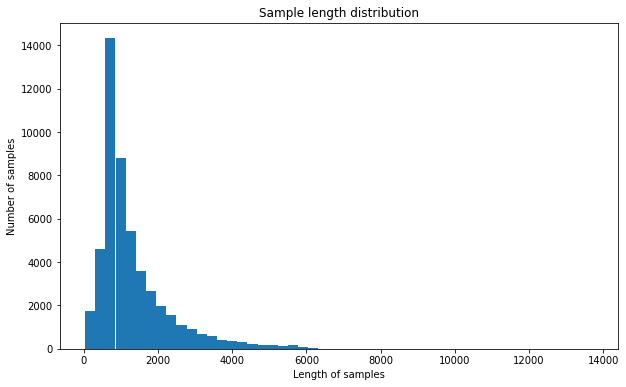

In [7]:
#Plot graph that will show length distribution
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(data['review'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

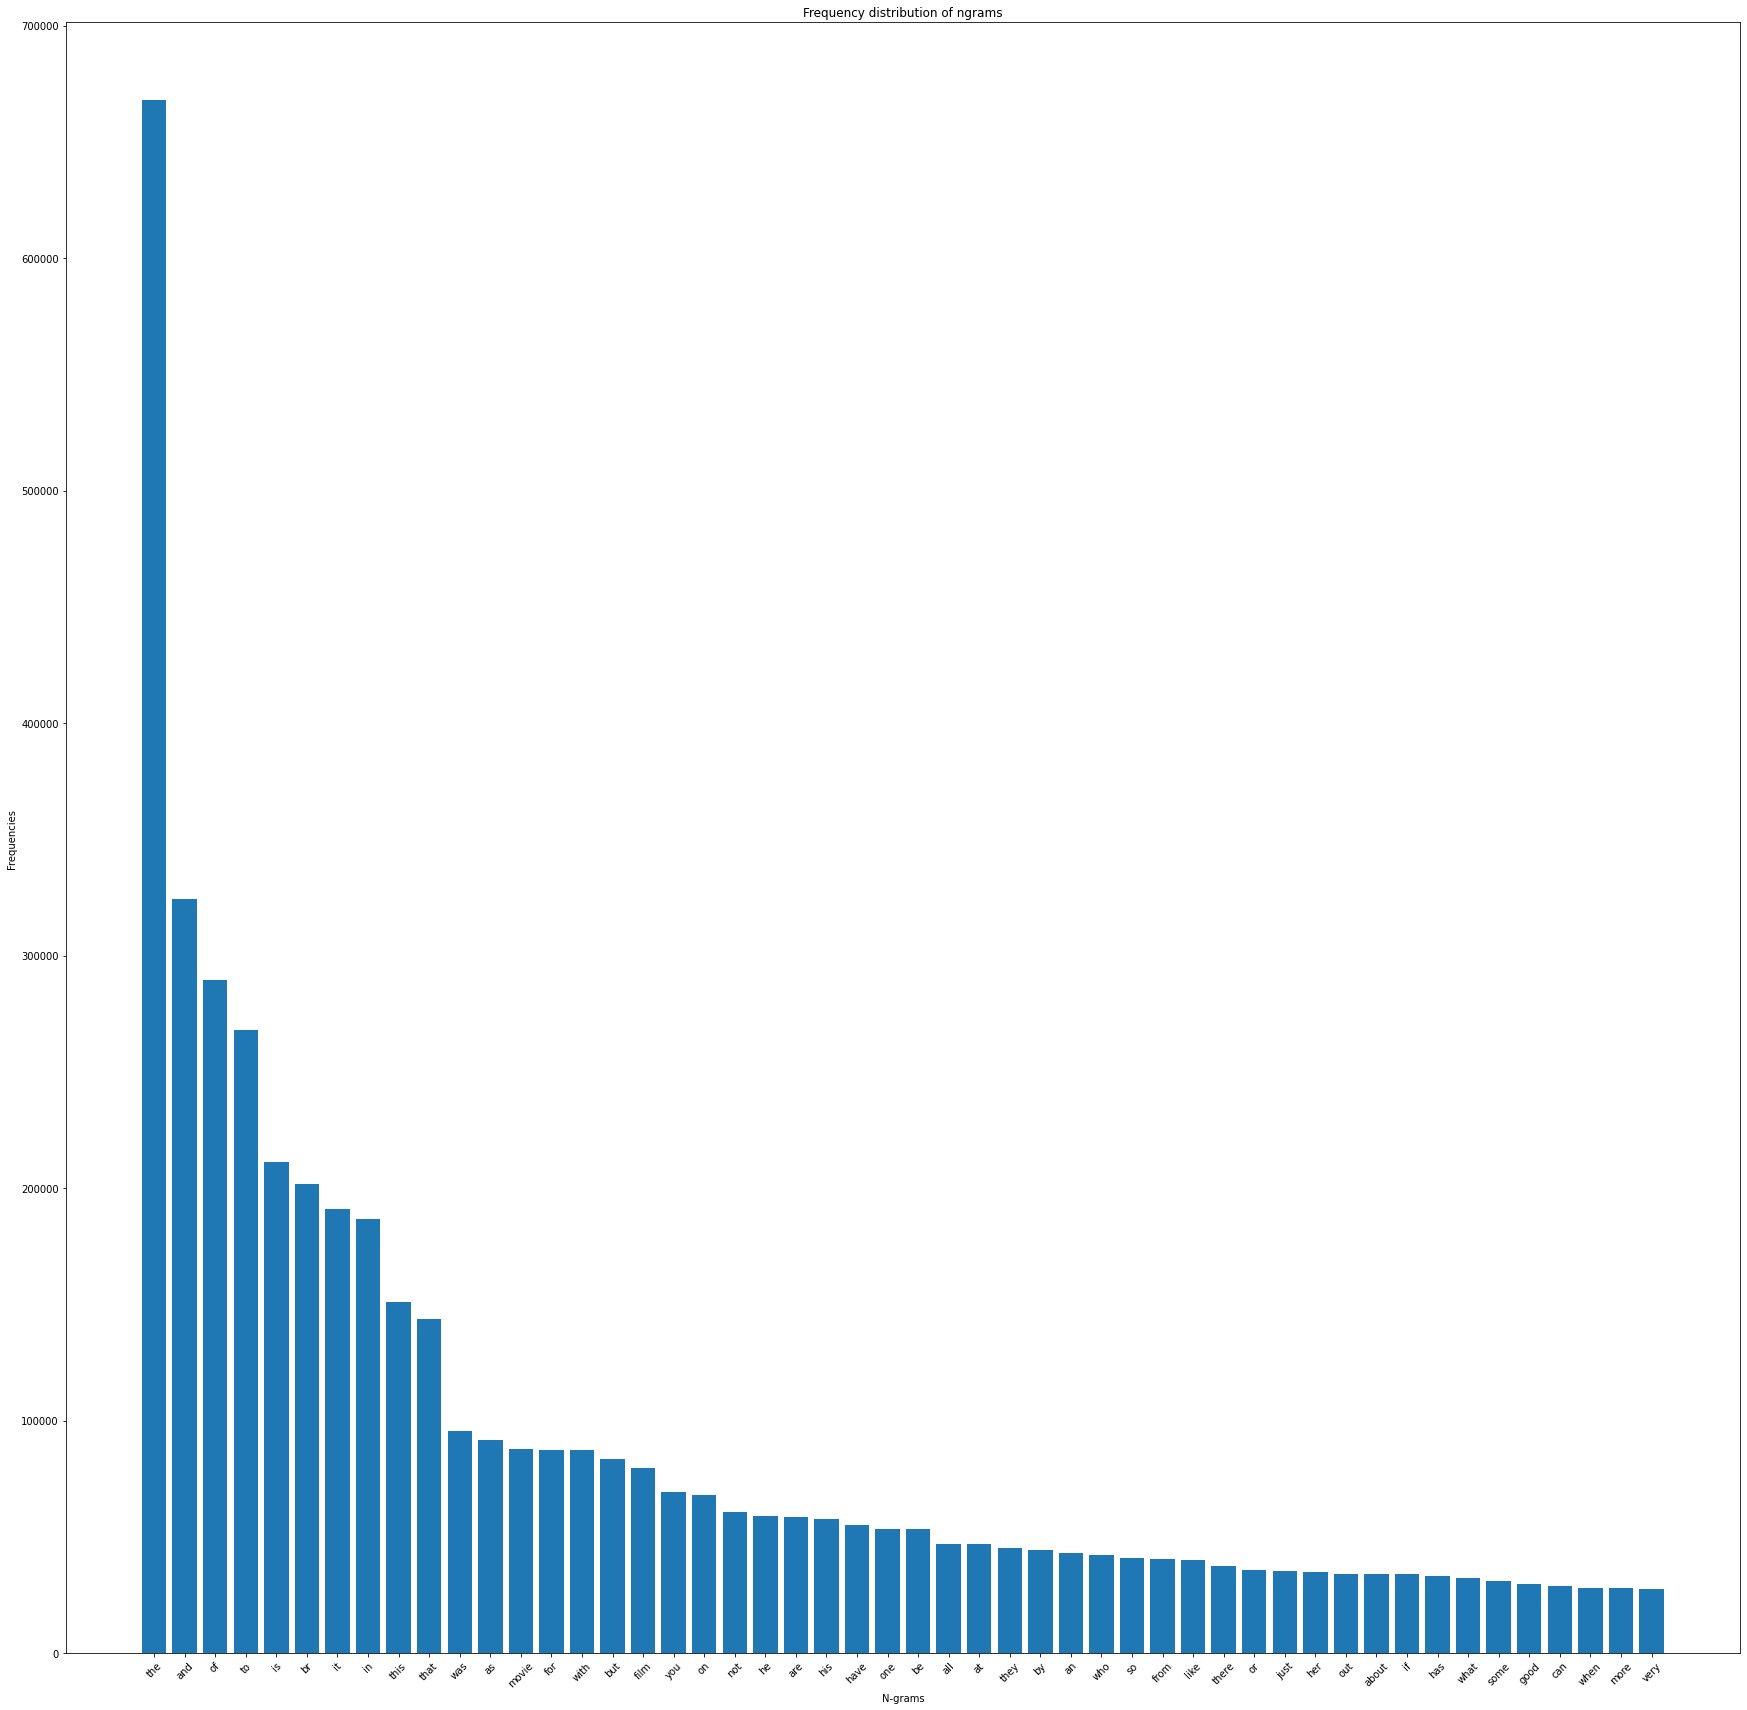

In [8]:
#plot graph that will show the frequency of words occuring


vectorizer = CountVectorizer()
# So, we get such structure:
#        | word1  | word2  |  word3 | word4
# text1  |   1    |    1   |   1    |   0
# text2  |   0    |    1   |   1    |   0
# text3  |   2    |    1   |   0    |   0
# text4  |   0    |    0   |   0    |   1
vect_texts = vectorizer.fit_transform(list(data['review']))
# ['word1', 'word2', 'word3', 'word4']
all_ngrams = vectorizer.get_feature_names()
num_ngrams = min(50, len(all_ngrams))
all_counts = vect_texts.sum(axis=0).tolist()[0]

all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

# Let's now plot a frequency distribution plot of the most seen words in the corpus.
plt.figure(figsize=(30, 30))
plt.bar(idx, counts, width=0.8)
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()

## **Preprocessing Data**

**Spliting data set as train and test**

In [0]:
# Split data in train and test with 25000 in train and 25000 in test data

X=data.review
X=X.to_numpy()
y = data.sentiment
y=y.to_numpy()



training_sentences, testing_sentences, training_labels, testing_labels = train_test_split( X, y, test_size=0.5, random_state=42)

**Finding shape of train sentences and train labels using numpy**

In [10]:
# Display the shape of training sentence and testing sentences
print(np.shape(testing_sentences))
print(np.shape(training_sentences))


(25000,)
(25000,)


**Defining variable**

Vocab_size : Upper limit of diffrent words (  Note that the vocab_size is specified large enough so as to ensure unique integer encoding for each and every word.)

max_length : What will be the maximum length of sentence

trunc_type : If sentence exceed max_length then where to truncate a sentence from begining or at end using 'post and 'pre' methods


In [0]:
# these variable value can be changed you should change and see the diffrence in the model.
vocab_size=10000 
embedding_dim=16
max_length=120
trunc_type='post' # It can be changed to pre and then see the diffrence in accuracy
oov_tok='<OOV>'




**Tokenize sequence**

 Tokenization is the task of chopping it up into pieces, called tokens.

 Eg.
 Input - How are you

 Output - 'How', 'are', 'you' 

 Here is a sample python code for better understanding



```
 sentences = [
    'I love my dog',
    'I love my cat so much',
    'You love my dog!'
]

Create object of Tokenizer and tokenize sentences

tokenizer = Tokenizer(num_words = 100)  # max distinct words first 100 words
tokenizer.fit_on_texts(sentences)
```




In [0]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

**Text to sequence**


texts_to_sequences Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.

Here two function will require text_to_sequences and word_index

In [0]:


word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(training_sentences)

**Example of text to sequence**

Here we have printed the first train sentence in text as well as with its corresponding integer that we have converted using text_to_sequence mothod in above cell.

In [15]:
print(sequences[0])
print(training_sentences[0])


[1, 7, 422, 21, 2, 115, 3063, 683, 32, 507, 1, 62, 11, 189, 3374, 1, 686, 1407, 1277, 103, 3, 2854, 71, 746, 6, 132, 19, 2, 169, 278, 17, 2, 20, 8, 8, 1994, 2, 113, 8, 8, 4849, 7, 75, 12, 596, 4069, 796, 1, 4, 1, 1119, 932, 1393, 934, 1710, 3870, 3048, 25, 498, 84, 2, 1758, 1876, 1, 21, 4, 2855, 17, 4, 2479, 5, 7874, 1049, 191, 3, 1011, 191, 6, 5217, 15, 954, 8286, 1, 1, 39, 7, 10, 8286, 2650, 53, 3039, 7, 431, 18, 25, 498, 3, 2, 742, 25, 568, 9, 1158, 2389, 1, 4, 1162, 3871, 1, 3, 1265, 3419, 7, 1399, 101, 93, 21, 41, 2855, 60, 7, 4438, 32, 8012, 1, 1, 3, 4, 171, 3797, 103, 586, 4, 1, 8164, 3420, 4, 1, 18, 4, 694, 6283, 5121, 5774, 3, 4, 4, 1, 6432, 1290, 544, 258, 17, 814, 1, 9237, 1691, 1, 101, 47, 5428, 2904, 37, 2295, 6, 907, 9436, 3, 47, 1876, 9238, 34, 31, 1949, 13, 390, 49, 74, 88, 182, 531, 42, 6, 27, 2, 2479, 5, 267, 6627, 8, 8, 2, 156, 9, 12, 16, 70, 22, 1021, 5121, 5774, 1412, 38, 4, 1176, 1, 266, 30, 2, 128, 8164, 3420, 7, 2750, 7, 10, 55, 589, 29, 417, 21, 6, 324, 9, 238,

**Padding sequence**

The pad_sequences() function in the Keras deep learning library can be used to pad variable length sequences.

The pad_sequences() function can also be used to pad sequences to a preferred length that may be longer than any observed sequences.

This can be done by specifying the “maxlen” argument to the desired length. Padding will then be performed on all sequences to achieve the desired length, as follows.

A sample python code is given below for better understanding.



```
padded_sequences = pad_sequences(sequences, padding='post',truncating='post',maxlen=5)

```



In [0]:

padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length)

**Compairing padded sequence with normal sequence**

In below cell we can see that in padded output  0 are added in starting so that the length will get uniformed as we have defined using max_length variable.

In [29]:
print(sequences[500])
print(padded[500])


[319, 468, 43, 227, 1, 3732, 8356, 36, 140, 1, 5, 2, 8329, 1279, 253, 17, 25, 201, 1044, 28, 4, 1, 40, 496, 6, 564, 47, 3512, 17, 25, 352, 4387, 19, 2, 80, 46, 4, 226, 52, 3121, 4804, 1, 9, 174, 32, 4, 1, 5, 25, 364, 50, 368, 3, 4, 900, 229, 160, 12, 4, 2366]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  319  468   43  227    1 3732 8356   36  140    1
    5    2 8329 1279  253   17   25  201 1044   28    4    1   40  496
    6  564   47 3512   17   25  352 4387   19    2   80   46    4  226
   52 3121 4804    1    9  174   32    4    1    5   25  364   50  368
    3    4  900  229  160   12    4 2366]


**Integer value corresponding to words**

In the below cell there is the list of diffrent words with their corresponding unique index value which we have created using text_to_sequences function in one of the above cell.

It can be printed using word_index method

In [30]:
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'movie': 16,
 'for': 17,
 'with': 18,
 'but': 19,
 'film': 20,
 'on': 21,
 'not': 22,
 'you': 23,
 'are': 24,
 'his': 25,
 'have': 26,
 'be': 27,
 'one': 28,
 'he': 29,
 'at': 30,
 'all': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'so': 35,
 'who': 36,
 'from': 37,
 'like': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'out': 42,
 'about': 43,
 'if': 44,
 "it's": 45,
 'has': 46,
 'some': 47,
 'there': 48,
 'what': 49,
 'good': 50,
 'very': 51,
 'more': 52,
 'when': 53,
 'up': 54,
 'no': 55,
 'time': 56,
 'my': 57,
 'even': 58,
 'would': 59,
 'she': 60,
 'only': 61,
 'which': 62,
 'story': 63,
 'really': 64,
 'their': 65,
 'see': 66,
 'can': 67,
 'had': 68,
 'me': 69,
 'were': 70,
 'well': 71,
 'much': 72,
 'than': 73,
 'we': 74,
 'bad': 75,
 'get': 76,
 'been': 77,
 'will': 78,
 'do': 79,
 'other': 80,
 'great': 81,
 'people': 82,


##**Model Building**

Here we have used LSTM algorithm

 ***What is LSTM ?***

LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.

 ***How LSTM works ?***

LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layer.

There are three types of gates within a unit:


1.   Input Gate: Scales input to cell (write)
2.   Output Gate: Scales output to cell (read)
3.   Forget Gate: Scales old cell value (reset)      




  



Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.

**No. of layers**

We have used 6 hidden layers and one output layer with hidden layer activation function as relu and output layer activation function as sigmoid.




In [0]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
##Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


##**Training and validating model**

1.   We have used 5 epochs to train
2.   No of training data = No of validating data = 25000



In [33]:
num_epochs = 5
model.fit(padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/5
782/782 [==============================] - 64s 82ms/step - loss: 0.6932 - accuracy: 0.4946 - val_loss: 0.6931 - val_accuracy: 0.5007
Epoch 2/5
782/782 [==============================] - 63s 81ms/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.4993
Epoch 3/5
782/782 [==============================] - 63s 81ms/step - loss: 0.6665 - accuracy: 0.5810 - val_loss: 0.6983 - val_accuracy: 0.4974
Epoch 4/5
782/782 [==============================] - 64s 81ms/step - loss: 0.5505 - accuracy: 0.7137 - val_loss: 0.4111 - val_accuracy: 0.8184
Epoch 5/5
782/782 [==============================] - 64s 81ms/step - loss: 0.3511 - accuracy: 0.8517 - val_loss: 0.3560 - val_accuracy: 0.8420


In [35]:
sentence = "boring"
sequence = tokenizer.texts_to_sequences([sentence])[0]

sequence=pad_sequences([sequence],maxlen=120,padding='pre')

k=model.predict_classes(sequence,verbose=0)
if k==0:
   print("Negative Review")
else:
   print("Positive review")

Negative Review


##**Conclusion**

We have implemented LSTM RNN model in our dataet after preprocessing the dataset and concluded that the validating accuracy is **83 %**. 

which can further be increased by applying diffrent algorithm and using k fold technique in our dataset.